<a href="https://colab.research.google.com/github/vhpraneeth/VIT_DWDM/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reg no: 18BCE7147

Name: V. Hari Praneeth

[GitHub Link](https://github.com/vhpraneeth/VIT_DWDM/blob/main/Project.ipynb)


# Project: __COVID-19 daily cases prediction__ - India

## Load data

In [ ]:
import pandas as pd
link = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
df = pd.read_csv(link)  # public data - continuously updated
df = df[df.location=='India']
print('Columns:', df.columns)
df = df[['date', 'new_cases', 'new_deaths', 'new_tests']]
df['date'] = pd.to_datetime(df['date'])
df.reset_index(drop=True, inplace=True)

Columns: Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_povert

In [ ]:
df.tail()

,date,new_cases,new_deaths,new_tests
318,2020-12-06,32981.0,391.0,1101063.0
319,2020-12-07,26567.0,385.0,801081.0
320,2020-12-08,32080.0,402.0,1026399.0
321,2020-12-09,31521.0,412.0,1022712.0
322,2020-12-10,29373.0,413.0,922959.0


In [ ]:
df = df.fillna(df.mean())
df.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


,date,new_cases,new_deaths,new_tests
318,2020-12-06,32981.0,391.0,1101063.0
319,2020-12-07,26567.0,385.0,801081.0
320,2020-12-08,32080.0,402.0,1026399.0
321,2020-12-09,31521.0,412.0,1022712.0
322,2020-12-10,29373.0,413.0,922959.0


##Checking data - __Data validation__

In [ ]:
df.shape

(323, 4)

No Null values found

In [ ]:
df.isnull().sum()

date          0
new_cases     0
new_deaths    0
new_tests     0
dtype: int64

No NA values found

In [ ]:
df.isna().any()

date          False
new_cases     False
new_deaths    False
new_tests     False
dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        323 non-null    datetime64[ns]
 1   new_cases   323 non-null    float64       
 2   new_deaths  323 non-null    float64       
 3   new_tests   323 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 10.2 KB


In [ ]:
df.describe()

,new_cases,new_deaths,new_tests
count,323.000000,323.000000,3.230000e+02
mean,30330.476780,440.201238,5.906856e+05
std,30440.419608,400.401646,4.058831e+05
min,0.000000,-1.000000,1.570000e+02
25%,897.500000,35.000000,1.679860e+05
50%,20903.000000,418.000000,5.906856e+05
75%,53171.000000,759.500000,9.743365e+05
max,97894.000000,2003.000000,1.492409e+06


##Visualize the data

In [ ]:
import plotly.express as px

In [ ]:
px.line(df, x='date',y='new_cases', title='date vs new_cases')

## Preparing the data before training - __Preprocessing__

Using data partially

In [ ]:
old_df = df.copy()
partial_df = df.iloc[250:]
df = partial_df.copy()
df.reset_index(drop=True, inplace=True)
df.head()

,date,new_cases,new_deaths,new_tests
0,2020-09-29,80472.0,1179.0,1142811.0
1,2020-09-30,86821.0,1181.0,1086688.0
2,2020-10-01,81484.0,1095.0,1423052.0
3,2020-10-02,79476.0,1069.0,1097947.0
4,2020-10-03,75829.0,940.0,1132675.0


In [ ]:
px.line(df, x='date', y='new_cases', title='date vs new_cases')

In [ ]:
X = df[['date']]
y = df['new_cases']

In [ ]:
import datetime
X = pd.DataFrame(X, dtype='<M8[ns]')
X.columns = ['date']
X['date'] = pd.to_datetime(X['date'])
X['date'] = X['date'].map(datetime.datetime.toordinal)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_test.shape

(19, 1)

## Training the model

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predicted = regressor.predict(X_test)
predicted

array([42054.93459171, 39455.64822167, 59600.11758965, 45953.86414683,
       55701.18803459, 57000.83121961, 28408.68114889, 41405.1129992 ,
       51802.25847948, 69347.44147742, 46603.68573934, 38156.00503659,
       47903.32892436, 34906.89707404, 52452.08007199, 31657.78911144,
       56351.0096271 , 27758.85955632, 37506.18344408])

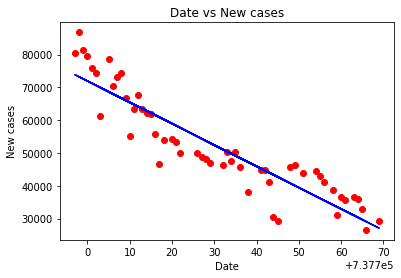

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Date vs New cases')
plt.xlabel('Date')
plt.ylabel('New cases')
plt.show()

## Comparing predicted and actual

In [ ]:
df_compare = pd.DataFrame({'Actual':y_test, 'Predicted':predicted})
df_compare = df_compare.join(X_test['date'])
df_compare.head()

,Actual,Predicted,date
49,38617.0,42054.934592,737746
53,45209.0,39455.648222,737750
22,55839.0,59600.117590,737719
43,47905.0,45953.864147,737740
28,43893.0,55701.188035,737725


In [ ]:
df_compare.shape

(19, 3)

In [ ]:
graph_df = df_compare.head(50).copy()
graph_df.drop(['date'], axis=1, inplace=True)
graph_df.head()

,Actual,Predicted
49,38617.0,42054.934592
53,45209.0,39455.648222
22,55839.0,59600.117590
43,47905.0,45953.864147
28,43893.0,55701.188035


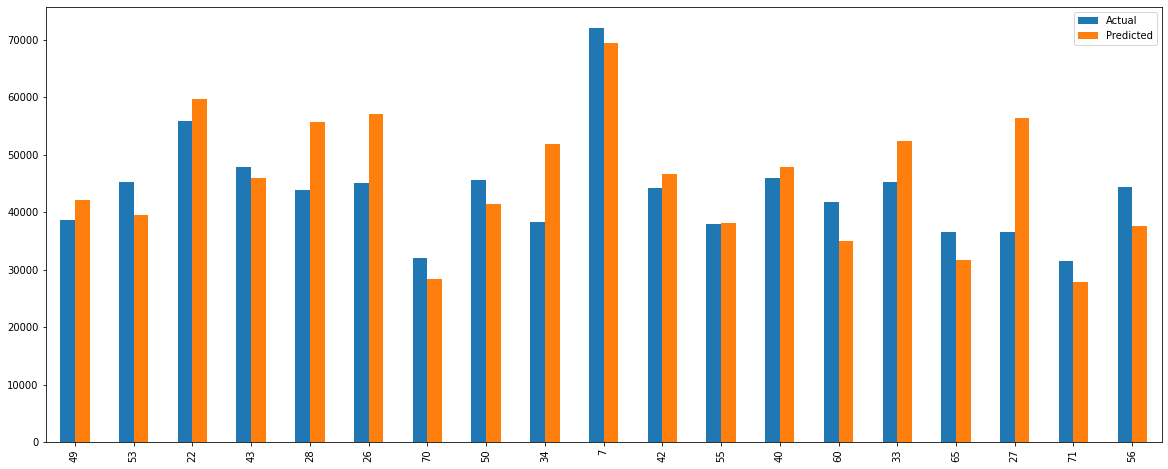

In [ ]:
graph_df.plot(kind='bar', figsize=(20,8))

In [ ]:
#px.scatter(graph_df, x='Actual', y='Predicted', title='date vs new_cases')

Score of the regressor

In [ ]:
#regressor.score(X_test, y_test)

## Prediction using custom values

Display today's date

In [ ]:
from datetime import date

today_date = date.today().strftime("%d-%m-%y")
print("Today's date:", today_date)

Today's date: 12-12-20


Predict for today

In [ ]:
X_test_2 = pd.DataFrame({'date': today_date}, index=[0])

X_test_2 = pd.DataFrame(X_test_2, dtype='<M8[ns]')
X_test_2['date'] = date.today()
X_test_2['date'] = X_test_2['date'].map(datetime.datetime.toordinal)

regressor.fit(X, y)
result = regressor.predict(X_test_2)
print('Prediction for today:', int(result[0]) )

Prediction for today: 26753


.

.

.

.

.

Extra project below

.

.

.

.

# Project 2: __Stock market prediction__ using Regression

##Import the libraries

In [ ]:
import math
import pandas_datareader as web  # for loading stock market data
import numpy as np
import pandas as pd

##Get the stock data

In [ ]:
df = web.DataReader('AAPL', data_source='yahoo', start='2015-01-01', end='2020-12-04') 
df.head()  # Show the data 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.696352
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.000614
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.002876
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.339447
2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.274624


Data has 2003 rows and 7 columns

Drop Adj Close column and make Date as a column instead of index

In [ ]:
df.drop('Adj Close',axis = 1, inplace = True)
df['Date'] = pd.to_datetime(df.index)
df.reset_index(drop=True, inplace=True)
df.head()

,High,Low,Open,Close,Volume,Date
0,27.860001,26.837500,27.847500,27.332500,212818400.0,2015-01-02
1,27.162500,26.352501,27.072500,26.562500,257142000.0,2015-01-05
2,26.857500,26.157499,26.635000,26.565001,263188400.0,2015-01-06
3,27.049999,26.674999,26.799999,26.937500,160423600.0,2015-01-07
4,28.037500,27.174999,27.307501,27.972500,237458000.0,2015-01-08


##Checking data

In [ ]:
df.shape

(1493, 6)

No null values found

In [ ]:
df.isnull().sum()

High      0
Low       0
Open      0
Close     0
Volume    0
Date      0
dtype: int64

No NA values found

In [ ]:
df.isna().any()

High      False
Low       False
Open      False
Close     False
Volume    False
Date      False
dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1493 entries, 0 to 1492
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   High    1493 non-null   float64       
 1   Low     1493 non-null   float64       
 2   Open    1493 non-null   float64       
 3   Close   1493 non-null   float64       
 4   Volume  1493 non-null   float64       
 5   Date    1493 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5)
memory usage: 70.1 KB


In [ ]:
df.describe()

,High,Low,Open,Close,Volume
count,1493.000000,1493.000000,1493.000000,1493.000000,1.493000e+03
mean,47.625487,46.631378,47.121591,47.150897,1.445291e+08
std,23.999440,23.228543,23.631543,23.630552,7.309383e+07
min,22.917500,22.367500,22.500000,22.584999,2.019780e+07
25%,29.932501,29.452499,29.637501,29.757500,9.565480e+07
50%,41.355000,40.412498,40.937500,40.912498,1.272076e+08
75%,53.605000,52.580002,53.000000,53.115002,1.757636e+08
max,137.979996,130.529999,137.589996,134.179993,6.488252e+08


##Visualize the data

In [ ]:
import plotly.express as px

Plotting the close price history

In [ ]:
px.line(df, x='Date',y='Close', title='Close Price History')

Plotting High vs Low

In [ ]:
px.scatter(df, x='High',y='Low', title='High vs Low')

Plotting Open vs Close

In [ ]:
px.scatter(df, x='Open',y='Close', title='Open vs Close')

## Preparing data for training

In [ ]:
X = df[['Open','High','Low','Volume']]
y = df['Close']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

Rows in training data

In [ ]:
X_train.shape

(1119, 4)

Rows in testing data

In [ ]:
X_test.shape

(374, 4)

In [ ]:
X_test.head()

,Open,High,Low,Volume
799,43.735001,43.962502,43.567501,126814000.0
1046,43.570000,43.787498,43.222500,103544800.0
1435,118.330002,118.830002,113.610001,184642000.0
54,31.780001,31.962500,31.629999,150838800.0
793,44.775002,45.119999,44.540001,155712400.0


In [ ]:
y_test.head()

799      43.757500
1046     43.742500
1435    115.540001
54       31.802500
793      44.597500
Name: Close, dtype: float64

## Training the model

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predicted = regressor.predict(X_test)

## Comparing predicted and actual

In [ ]:
df_compare = pd.DataFrame({'Actual':y_test, 'Predicted':predicted})
df_compare.join(df['Date'])
df_compare.head()

,Actual,Predicted
799,43.757500,43.767387
1046,43.742500,43.483219
1435,115.540001,115.357702
54,31.802500,31.797376
793,44.597500,44.846219


In [ ]:
df_compare.shape

(374, 2)

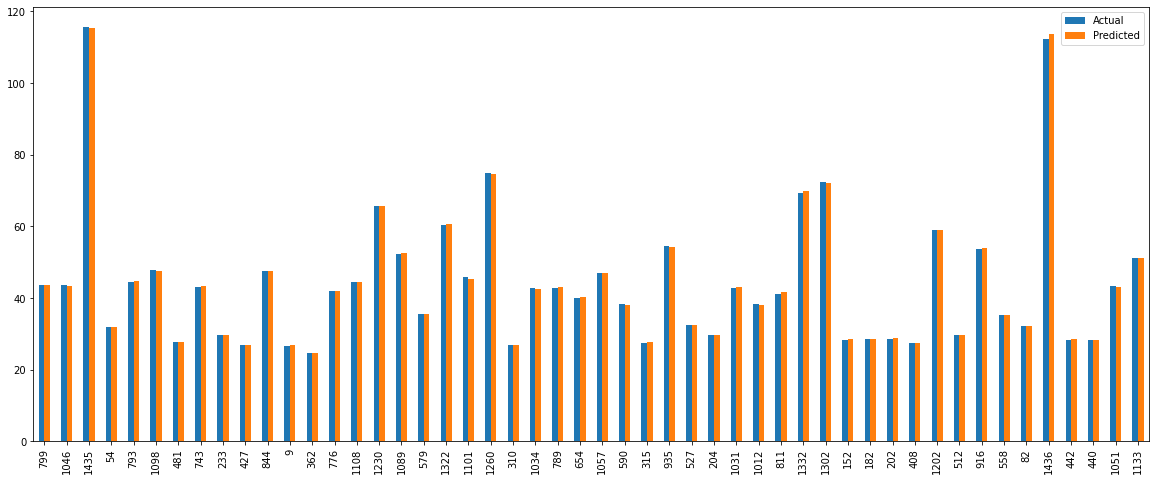

In [ ]:
graph_df = df_compare.head(50)
graph_df.plot(kind='bar', figsize=(20,8))

## Score of the regressor

In [ ]:
regressor.score(X_test, y_test)

0.9997349926603495

Predicting using custom values

In [ ]:
X_test_2 = pd.DataFrame({'Open': 37, 'High': 38, 'Low': 37, 'Volume': 146640000.0}, index=[0])
prediction = regressor.predict(X_test_2)
print('Prediction for Close:', prediction[0])

Prediction for Close: 37.80142831557344
